# **Mielage Prediction - Regression Analysis**

-------------

## **Objective**

To predict the mileage using regression analysis

## **Data Source**

Data Set Information:

This dataset is a slightly modified version of the dataset provided in the StatLib library.


Attribute Information:

mpg: continuous
cylinders: multi-valued discrete
displacement: continuous
horsepower: continuous
weight: continuous
acceleration: continuous
model year: multi-valued discrete
origin: multi-valued discrete
car name: string (unique for each instance)

## **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,r2_score,confusion_matrix,mean_squared_error


## **Import Data**

## **Describe Data**

In [ ]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## **Data Preprocessing**

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [ ]:
df = df.dropna()


## **Define Target Variable (y) and Feature Variables (X)**

In [ ]:
df.columns


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
y = df['mpg']


In [ ]:
X = df[['displacement', 'horsepower', 'weight', 'acceleration']]


In [ ]:
X


,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


**Scaling Data**

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [ ]:
pd.DataFrame(X).describe()


,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


## **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 2529)


## **Modeling**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:

lr.intercept_

23.485738559737584

In [ ]:
lr.coef_

array([-1.05767743, -1.68734727, -4.10787617, -0.11495177])

## **Model Evaluation**

In [ ]:
lr.intercept_

23.485738559737584

In [ ]:
lr.coef_

array([-1.05767743, -1.68734727, -4.10787617, -0.11495177])

## **Prediction**

In [ ]:
y_pred = lr.predict(X_train)
y_pred

array([ 9.09370729, 30.82739379, 20.96919678, 17.19345333, 23.59706083,
       16.09719535, 29.50731561,  9.69217166, 18.14438636, 27.83120758,
       27.89300341, 32.15590072, 28.64024922, 24.75873415, 25.13427592,
       15.8650855 , 29.59775438, 19.16805111, 31.81685439, 11.62035484,
       15.461433  , 29.13919594, 27.12004257, 30.09815986, 29.62548537,
       21.11238846, 26.57447352, 13.02576574, 14.47155289,  7.61401081,
       30.27479398, 23.74532207, 30.44107621, 28.54889027, 23.95165397,
       11.64181219, 31.18293244, 30.02959332, 22.23775154, 10.78338517,
       24.71388145, 30.92039001, 27.80253451, 31.10285039, 31.78620575,
       32.41251121, 29.54325829, 13.41675238, 25.9287047 , 30.04534228,
       24.33390726, 31.150253  , 30.50102797,  7.98581895, 28.41936653,
       23.50033904, 25.26977373, 14.89014614, 28.18240378, 27.27251923,
       28.92126387, 27.26449952, 29.60339408,  9.44922126, 27.3762101 ,
       18.83437091, 31.89992521, 27.70053522, 20.54102145, 25.82

In [ ]:
cus = {
    'displacement':307.0,
    'horsepower': 120,
    'weight': 3000,
    'acceleration': 14.0
}
cusdf = pd.DataFrame([cus])
cusdf_scaled = ss.transform(cusdf)
cusdf = cusdf.dropna()
y_pred = lr.predict(cusdf_scaled)
print(y_pred)

[23.48573856]


In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([18.51865637, 15.09305675, 14.30128789, 23.6753321 , 29.7546115 ,
       23.68796629, 26.61066644, 24.56692437, 15.06260986, 11.94312046,
       24.08050053, 27.96518468, 31.66130278, 31.01309132, 18.32428976,
       19.32795009, 28.08847536, 32.1506879 , 31.15859692, 27.15792144,
       18.82433097, 22.54580176, 26.15598115, 32.36393869, 20.74377679,
        8.78027518, 22.19699435, 18.20614294, 25.00052718, 15.26421552,
       23.13441082, 17.10542257,  9.87180062, 30.00790415, 20.41204655,
       29.11860245, 24.4305187 , 21.72601835, 10.51174626, 13.12426391,
       21.41938406, 19.96113872,  6.19146626, 17.79025345, 22.5493033 ,
       29.34765021, 13.4861847 , 25.88852083, 29.40406946, 22.41841964,
       22.07684766, 16.46575802, 24.06290693, 30.12890046, 10.11318121,
        9.85011438, 28.07543852, 23.41426617, 20.08501128, 30.68234133,
       20.92026393, 26.78370281, 22.9078744 , 14.15936872, 24.6439883 ,
       26.95515832, 15.25709393, 24.11272087, 30.80980589, 14.97

**Model Accuracy**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
mean_absolute_error(y_test, y_pred)

3.3286968643244106

In [ ]:
mean_squared_error(y_test, y_pred)

17.898948508488036

In [ ]:
from sklearn.tree import DecisionTreeRegressor
mdl = DecisionTreeRegressor()
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred)

27.252118644067796

In [ ]:
mean_absolute_error(y_test,y_pred)

3.6788135593220335

Classification

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
def categorize_mpg(mpg):
    if mpg < 20:
        return 'Low Efficiency'
    elif 20 <= mpg <= 30:
        return 'Moderate Efficiency'
    else:
        return 'High Efficiency'

In [ ]:
df['efficiency_class'] = df['mpg'].apply(categorize_mpg)
X = df[['cylinders', 'horsepower', 'weight', 'acceleration']]
y = df['efficiency_class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
y_pred = log_reg_model.predict(X_test)
print(y_pred)

['High Efficiency' 'Moderate Efficiency' 'High Efficiency'
 'High Efficiency' 'Moderate Efficiency' 'Moderate Efficiency'
 'Low Efficiency' 'High Efficiency' 'Low Efficiency' 'High Efficiency'
 'Low Efficiency' 'Moderate Efficiency' 'Low Efficiency'
 'Moderate Efficiency' 'Moderate Efficiency' 'Moderate Efficiency'
 'Low Efficiency' 'Moderate Efficiency' 'Moderate Efficiency'
 'Moderate Efficiency' 'Moderate Efficiency' 'High Efficiency'
 'High Efficiency' 'Low Efficiency' 'High Efficiency'
 'Moderate Efficiency' 'Moderate Efficiency' 'Low Efficiency'
 'High Efficiency' 'Moderate Efficiency' 'Low Efficiency' 'Low Efficiency'
 'Low Efficiency' 'Moderate Efficiency' 'Low Efficiency' 'High Efficiency'
 'Low Efficiency' 'High Efficiency' 'Low Efficiency' 'Low Efficiency'
 'Low Efficiency' 'Moderate Efficiency' 'High Efficiency'
 'Moderate Efficiency' 'Low Efficiency' 'Low Efficiency' 'Low Efficiency'
 'Moderate Efficiency' 'High Efficiency' 'High Efficiency'
 'Low Efficiency' 'Moderate Eff

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
classification_report(y_test, y_pred)

'                     precision    recall  f1-score   support\n\n    High Efficiency       0.33      0.50      0.40        10\n     Low Efficiency       0.90      0.90      0.90        29\nModerate Efficiency       0.77      0.68      0.72        40\n\n           accuracy                           0.73        79\n          macro avg       0.67      0.69      0.67        79\n       weighted avg       0.76      0.73      0.74        79\n'

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 5,  0,  5],
       [ 0, 26,  3],
       [10,  3, 27]])

In [ ]:
accuracy_score(y_test,y_pred)

0.7341772151898734

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.7215189873417721

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 5,  0,  5],
       [ 0, 26,  3],
       [10,  4, 26]])

In [ ]:
classification_report(y_test,y_pred)

'                     precision    recall  f1-score   support\n\n    High Efficiency       0.33      0.50      0.40        10\n     Low Efficiency       0.87      0.90      0.88        29\nModerate Efficiency       0.76      0.65      0.70        40\n\n           accuracy                           0.72        79\n          macro avg       0.65      0.68      0.66        79\n       weighted avg       0.75      0.72      0.73        79\n'

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.27848101265822783

In [ ]:
classification_report(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'                     precision    recall  f1-score   support\n\n    High Efficiency       0.06      0.10      0.07        10\n     Low Efficiency       0.34      0.72      0.46        29\nModerate Efficiency       0.00      0.00      0.00        40\n\n           accuracy                           0.28        79\n          macro avg       0.13      0.27      0.18        79\n       weighted avg       0.13      0.28      0.18        79\n'

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 1,  9,  0],
       [ 8, 21,  0],
       [ 8, 32,  0]])

Clustering

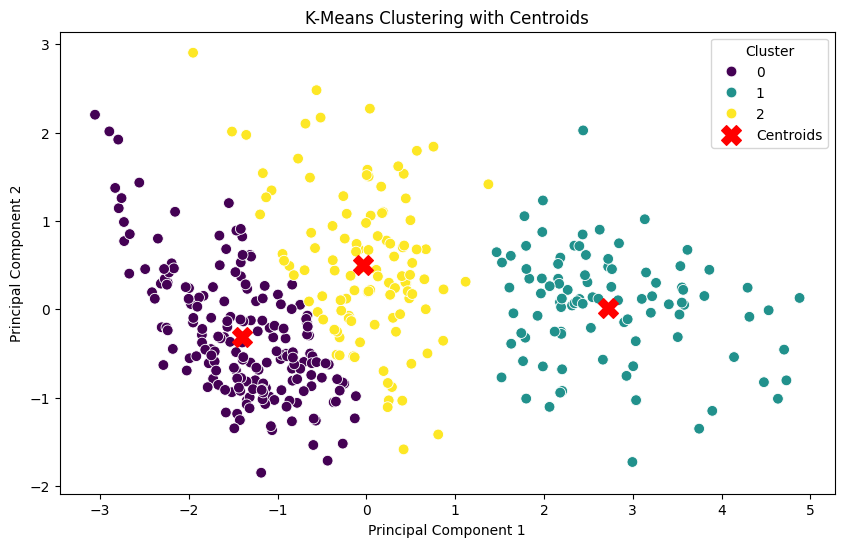

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
features = ['displacement', 'horsepower', 'weight', 'acceleration']
df[features] = ss.fit_transform(df[features])
scaled_features = ss.fit_transform(df[features])
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=df['KMeans_Cluster'], palette='viridis', s=60)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], color='red', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering with Centroids")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


In [ ]:
silhouette_score(scaled_features,df['KMeans_Cluster'])

0.39443031329739714

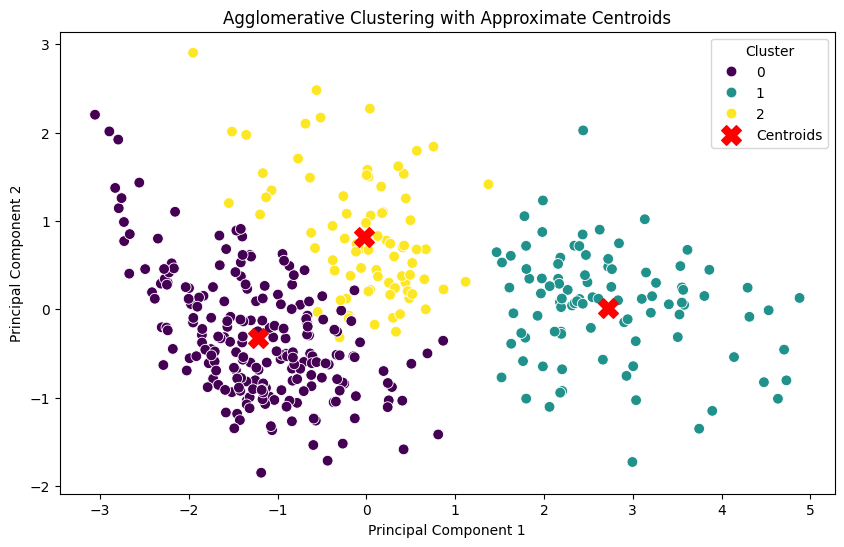

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

features = ['displacement', 'horsepower', 'weight', 'acceleration']
df[features] = ss.fit_transform(df[features])
scaled_features = ss.fit_transform(df[features])

agg_clustering = AgglomerativeClustering(n_clusters=3)
df['Agglomerative_Cluster'] = agg_clustering.fit_predict(scaled_features)

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

centroids = np.array([pca_features[df['Agglomerative_Cluster'] == i].mean(axis=0) for i in range(3)])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=df['Agglomerative_Cluster'], palette='viridis', s=60)
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', s=200, marker='X', label='Centroids')
plt.title("Agglomerative Clustering with Approximate Centroids")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


In [ ]:
silhouette_score(scaled_features,df['Agglomerative_Cluster'])

0.4009267887206079

## **Explaination**

The Mileage Prediction project is all about forecasting vehicle fuel economy using regression analysis in terms of miles per gallon (mpg). It is a modified version of the StatLib library dataset and contains features such as cylinders, displacement, horsepower, weight, acceleration, model year and origin. The raw data must be imported and preprocessed to remove missing values and scaling attributes. Data visualization helps us interpret the relations among variables. The dependent variable is mpg while independent variables include displacement, horsepower, weight and acceleration. Next we split the dataset into two parts namely training set and testing set where linear regression model will be trained on the training data. This performance of this model can be assessed with metrics like Average Absolute Error (MAE), Mean Absolute Percentage Error (MAPE) or R² Score. Finally, predictions are made based on the test data by applying these results to determine how accurately it was able to predict car performance based only upon information provided about those four quantities: displacement/weight ratio; number of cylinders/horsepower ratings; age/year made; country where manufactured/to whom sold abroad?